<a href="https://colab.research.google.com/github/EfimovIN/mipt/blob/master/Seminar_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Семинар 1
## Обучение с подкреплением: OpenAI gym, CrossEntropy Method (CEM), Deep CEM.

## 1. OpenAI gym

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output
%matplotlib inline

#устанавливаем библиотеки для визуализации в colab
!apt-get -qq -y install  libnvtoolsext1 > /dev/null
!ln -snf /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so.8.0 /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so
!apt-get -qq -y install xvfb freeglut3-dev ffmpeg> /dev/null
!pip -q install gym
!pip -q install pyglet
!pip -q install pyopengl
!pip -q install pyvirtualdisplay==0.2.5

import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import HTML


# запускаем virtual display
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()
import os
os.environ["DISPLAY"] = ":" + str(display.display) + "." + str(display.screen)


def show_animation(frames):
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')
    animate = lambda i: patch.set_data(frames[i])
    ani = matplotlib.animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval = 50)
    return ani

На семинаре мы будем пользоваться стандартными средами, реализованными в библиотеке OpenAI Gym (https://gym.openai.com).

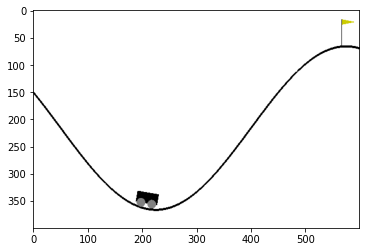

In [ ]:
import gym

# создаем окружение
env = gym.make("MountainCar-v0")
env.reset()
# рисуем картинку
plt.imshow(env.render('rgb_array'))
env.close()

Основные методы класса Env:

* reset() - инициализация окружения, возвращает первое наблюдение (состояние)
* render() - визуализация текущего состояния среды
* step($a$) - выполнить в среде действие a и получить кортеж: $<s_{t+1}, r_t, done, info>$, где done флаг заверешния, а info - дополнительная информация.

Прежде чем начать взаимодействие с окружением, нужно использовать метод reset():

In [ ]:
state0 = env.reset()
print("изначальное состояние среды:", state0)
# выполняем действие 2 
new_state, reward, done, _ = env.step(2)
print("новое состояние:", new_state)
print("вознаграждение", reward)

изначальное состояние среды: [-0.52959528  0.        ]
новое состояние: [-0.52855031  0.00104497]
вознаграждение -1.0


### Среда MountainCar-v0
* Состояния: Type: Box(2)



Num | Observation  | Min  | Max  
----|--------------|------|----   
0   | position     | -1.2 | 0.6
1   | velocity     | -0.07| 0.07


* Действия: Type: Discrete(3)



Num | Action|
----|-------------|
0   | push left   |
1   | no push     |
2   | push right  |

* Вознаграждения: -1 за каждый шаг, пока не достигнута цель 

* Начальное состояние: Случайная позиция от -0.6 до -0.4 с нулевой скоростью.

### Задание
В среде MountainCar-v0 мы хотим, чтобы тележка достигла флага. Давайте решим эту задачу, не используя обучение с подкреплением. Модифицируйте код функции act() ниже для выполнения этого задания. Функция получает на вход состояние среды и должна вернуть действие. 

In [ ]:
def act(s):
    actions = {'left': 0, 'stop': 1, 'right': 2}
    
    # пример: можем попробовать ехать только влево
    # action = actions['left'] 
    ####### Здесь ваш код ##########
    raise NotImplementedError
    ################################
    return action

Проверяем решение:

In [ ]:
# создаем окружение, с ограничением на число шагов, используя wrapper (обертку) TimeLimit
env = gym.wrappers.TimeLimit(gym.make("MountainCar-v0"), max_episode_steps=250)
# проводим инициализацию и запоминаем начальное состояние
s = env.reset()
done = False

frames = []

frames.append(env.render(mode = 'rgb_array'))

while not done:
    # выполняем действие, получаем s, r, done
    s, r, done, _ = env.step(act(s))
    frames.append(env.render(mode = 'rgb_array'))
    # визуализируем окружение
    env.render()

env.close()
if s[0] > 0.47:
    print("Задание выполнено!")
else:
    print("""Исправьте функцию выбора действия!""")

HTML(show_animation(frames).to_jshtml())

## 2. Crossentropy Method

В этом пункте мы посмотрим на то, как решить задачи RL с помощью метода crossentropy.

Рассмотрим пример с задачей Taxi [Dietterich, 2000]. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gym

env = gym.make("Taxi-v3")
env.reset()
env.render()

In [ ]:
n_states  = env.observation_space.n
n_actions = env.action_space.n  

print(f"состояний: {n_states} действий: {n_actions}")

В этот раз нашей стратегией будет вероятностное распределение. 

$\pi(s,a) = P(a|s)$

Для задачи такси мы можем использовать таблицу: 

policy[s,a] = P(выбрать действие a | в состоянии s)

Создадим "равномерную" стратегию в виде двумерного массива с 
равномерным распределением по действиям и сгенерируем игровую сессию с такой стратегией

In [ ]:
def initialize_policy(n_states, n_actions):
    ####### Здесь ваш код ##########
    raise NotImplementedError
    ################################
    return policy

policy = initialize_policy(n_states, n_actions)

In [ ]:
assert type(policy) in (np.ndarray, np.matrix)
assert np.allclose(policy, 1./n_actions)
assert np.allclose(np.sum(policy, axis=1), 1)

### Генерация сессий взаимодейтсвия со средой.

Мы будем запоминать все состояния, действия и вознаграждения за эпизод.

In [ ]:
def generate_session(env, policy, t_max=10**4):
    """
    Игра идет до конца эпизода или до t_max шагов в окружении. 
    :param policy: [n_states,n_actions] 
    :returns: states - список состояний, actions - список действий, total_reward - итоговое вознаграждение
    """
    states, actions = [], []
    total_reward = 0.

    s = env.reset()

    for t in range(t_max):
        # Выбираем действие согласно текущей стратегии
        # Подсказка: можно воспользоваться np.random.choice для сэмплирования действий
        # https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
        # a = 
        ####### Здесь ваш код ########## 
        raise NotImplementedError 
        ################################

        new_s, r, done, info = env.step(a)

        # Запоминаем нужную нам информацию
        states.append(s)
        actions.append(a)
        total_reward += r

        s = new_s
        if done:
            break

    return states, actions, total_reward

In [ ]:
s, a, r = generate_session(env, policy)
assert type(s) == type(a) == list
assert len(s) == len(a)
assert type(r) in [float, np.float]

In [ ]:
# посмотрим на изначальное распределение вознаграждения
import matplotlib.pyplot as plt
%matplotlib inline

sample_rewards = [generate_session(env, policy, t_max=1000)[-1] for _ in range(200)]

plt.hist(sample_rewards, bins=20)
plt.vlines([np.percentile(sample_rewards, 50)], [0], [100], label="50'th percentile", color='green')
plt.vlines([np.percentile(sample_rewards, 90)], [0], [100], label="90'th percentile", color='red')
plt.legend()

### Реализация метода crossentropy  

Наша задача - выделить лучшие действия и состояния, т.е. такие, при которых было лучшее вознаграждение:

In [ ]:
def select_elites(states_batch, actions_batch, 
                  rewards_batch, percentile=50):
    """
    Выбирает состояния и действия с заданным перцентилем (rewards >= percentile)
    :param states_batch: list of lists of states, states_batch[session_i][t]
    :param actions_batch: list of lists of actions, actions_batch[session_i][t]
    :param rewards_batch: list of rewards, rewards_batch[session_i]
    
    :returns: elite_states, elite_actions - одномерные 
    списки состояния и действия, выбранных сессий
    """
    # нужно найти порог вознаграждения по процентилю
    # reward_threshold =
    ####### Здесь ваш код ##########
    raise NotImplementedError
    ################################
    
    
    # в соответствии с найденным порогом - отобрать 
    # подходящие состояния и действия
    # elite_states = 
    # elite_actions = 
    ####### Здесь ваш код ##########
    raise NotImplementedError
    ################################
    
    return elite_states, elite_actions

In [ ]:
states_batch = [
    [1, 2, 3],     # game1
    [4, 2, 0, 2],  # game2
    [3, 1],        # game3
]

actions_batch = [
    [0, 2, 4],     # game1
    [3, 2, 0, 1],  # game2
    [3, 3],        # game3
]
rewards_batch = [
    3,  # game1
    4,  # game2
    5,  # game3
]

test_result_0 = select_elites(states_batch, actions_batch, rewards_batch, percentile=0)
test_result_30 = select_elites(states_batch, actions_batch, rewards_batch, percentile=30)
test_result_90 = select_elites(states_batch, actions_batch, rewards_batch, percentile=90)
test_result_100 = select_elites(states_batch, actions_batch, rewards_batch, percentile=100)

assert np.all(
    test_result_0[0] == [1, 2, 3, 4, 2, 0, 2, 3, 1]) \
       and np.all(
    test_result_0[1] == [0, 2, 4, 3, 2, 0, 1, 3, 3]), \
    "Для процентиля 0 необходимо выбрать все состояния " \
    "и действия в хронологическом порядке"

assert np.all(test_result_30[0] == [4, 2, 0, 2, 3, 1])\
   and np.all(test_result_30[1] == [3, 2, 0, 1, 3, 3]), \
    "Для процентиля 30 необходимо выбрать " \
    "состояния/действия из [3:]"
assert np.all(test_result_90[0] == [3, 1]) and \
       np.all(test_result_90[1] == [3, 3]), \
    "Для процентиля 90 необходимо выбрать состояния " \
    "действия одной игры"
assert np.all(test_result_100[0] == [3, 1]) and \
       np.all(test_result_100[1] == [3, 3]), \
    "Проверьте использование знаков: >=,  >. " \
    "Также проверьте расчет процентиля"
print("Тесты пройдены!")


Теперь мы хотим написать обновляющуюся стратегию:

In [ ]:
def update_policy(elite_states,elite_actions):
    """
    Новой стратегией будет:
    policy[s_i,a_i] ~ #[вхождения  si/ai в лучшие states/actions]
    
    Не забудьте про нормализацию состояний.
    Если какое-то состояние не было посещено, 
    то используйте равномерное распределение 1./n_actions
    
    :param elite_states:  список состояний
    :param elite_actions: список действий
    """
    new_policy = np.zeros([n_states,n_actions])
    for state in range(n_states):
        # обновляем стратегию - нормируем новые частоты 
        # действий и не забываем про непосещенные состояния
        # new_policy[state, a] =         
        ####### Здесь ваш код ##########
        raise NotImplementedError
        ################################
        
    return new_policy

In [ ]:
elite_states, elite_actions = (
    [1, 2, 3, 4, 2, 0, 2, 3, 1],
    [0, 2, 4, 3, 2, 0, 1, 3, 3])

new_policy = update_policy(elite_states, elite_actions)

assert np.isfinite(
    new_policy).all(), "Стратегия не должна содержать " \
                       "NaNs или +-inf. Проверьте " \
                       "деление на ноль. "
assert np.all(
    new_policy >= 0), "Стратегия не должна содержать " \
                      "отрицательных вероятностей "
assert np.allclose(new_policy.sum(axis=-1),
                   1), "Суммарная\ вероятность действий"\
                       "для состояния должна равняться 1"
reference_answer = np.array([
    [1., 0., 0., 0., 0.],
    [0.5, 0., 0., 0.5, 0.],
    [0., 0.33333333, 0.66666667, 0., 0.],
    [0., 0., 0., 0.5, 0.5]])
assert np.allclose(new_policy[:4, :5], reference_answer)
print("Тесты пройдены!")

### Цикл обучения

Визуализириуем наш процесс обучения и также будем измерять распределение получаемых за сессию вознаграждений 

In [ ]:
from IPython.display import clear_output

def show_progress(rewards_batch, log, percentile, reward_range=[-990, +10]):
    """
    Удобная функция, для визуализации результатов.
    """

    mean_reward = np.mean(rewards_batch)
    threshold = np.percentile(rewards_batch, percentile)
    log.append([mean_reward, threshold])
    
    plt.figure(figsize=[8, 4])
    plt.subplot(1, 2, 1)
    plt.plot(list(zip(*log))[0], label='Mean rewards')
    plt.plot(list(zip(*log))[1], label='Reward thresholds')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.hist(rewards_batch, range=reward_range)
    plt.vlines([np.percentile(rewards_batch, percentile)],
               [0], [100], label="percentile", color='red')
    plt.legend()
    plt.grid()
    clear_output(True)
    print("mean reward = %.3f, threshold=%.3f" % (mean_reward, threshold))
    plt.show()

In [ ]:
# инициализируем стратегию
policy = initialize_policy(n_states, n_actions)

In [ ]:
n_sessions = 250  # количество сессий для сэмплирования
percentile = 50  # перцентиль 
learning_rate = 0.5 # то как быстро стратегия будет обновляться 

log = []

for i in range(100):
    # генерируем n_sessions сессий
    # %time sessions = []
    ####### Здесь ваш код ##########
    raise NotImplementedError
    ################################
    
    states_batch,actions_batch,rewards_batch = zip(*sessions)
    # отбираем лучшие действия и состояния ###
    # elite_states, elite_actions = 
    ####### Здесь ваш код ##########
    raise NotImplementedError
    ################################
    
    # обновляем стратегию
    # new_policy =
    ####### Здесь ваш код ##########
    raise NotImplementedError
    ################################
    
    policy = learning_rate * new_policy + (1 - learning_rate) * policy

    # display results on chart
    show_progress(rewards_batch, log, percentile)

### Посмотрим на результаты
Задача такси быстро сходится, начиня с вознаграждения -1000 к почти оптимальному значению, а потом опять падает до -50/-100. Это вызвано случайностью в самом окружении - случайное начальное состояние пассажира и такси, в начале каждого эпизода. 

В случае если алгоритм CEM не сможет научиться тому, как решить задачу из какого-то стартового положения, он просто отбросит этот эпизод, т.к. не будет сессий, которые переведут этот эпизод в топ лучших. 

Для решения этой проблемы можно уменьшить threshold (порог лучших состояний) или изменить способ оценки стратегии, используя новую стратегию, полученную из каждого начального состояния и действия (теоретически правильный способ).

## 3. Deep CEM

В данной части мы рассмотрим применение CEM вместе с нейронной сетью.
Будем обучать многослойную нейронную сеть для решения простой задачи с непрерывным пространством действий.

<img src="https://camo.githubusercontent.com/8f39c7f54a7798e7f80c9ec5c0bb610696e5c5b7/68747470733a2f2f7469702e64756b652e6564752f696e646570656e64656e745f6c6561726e696e672f677265656b2f6c6573736f6e2f64696767696e675f6465657065725f66696e616c2e6a7067">

Будем тестировать нашего нового агента на известной задаче перевернутого маятника с непрерывным пространством состояний.
https://gym.openai.com/envs/CartPole-v0/

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make("CartPole-v0")

env.reset()
n_actions = env.action_space.n
state_dim = env.observation_space.shape[0]
                                        
print(f"состояний: {state_dim} действий: {n_actions}")

### Стратегия с нейронной сетью

Попробуем заменить метод обновления вероятностей на нейронную сеть. 
Будем пользоваться упрощенной реализацией нейронной сети из пакета Scikit-learn.
Нам потребуется: 
* agent.partial_fit(states, actions) - делает один проход обучения по данным. Максимизирует вероятность :actions: из :states:
* agent.predict_proba(states) - предсказыает вероятность каждого из действий, в виде матрицы размера [len(states), n_actions]

In [ ]:
from sklearn.neural_network import MLPClassifier

agent = MLPClassifier(
    hidden_layer_sizes=(20, 20),
    activation='tanh',
)

# initialize agent to the dimension of state space and number of actions
agent.partial_fit([env.reset()] * n_actions, range(n_actions), range(n_actions))

In [ ]:
def generate_session(env, agent, t_max=1000):
    
    states,actions = [],[]
    total_reward = 0
    
    s = env.reset()
    
    for t in range(t_max):
        # предсказываем вероятности действий по сети и 
        # выбираем одно действие
        # probs = 
        # a = 
        ####### Здесь ваш код ##########
        raise NotImplementedError
        ################################
        
        new_s,r,done,info = env.step(a)
        
        states.append(s)
        actions.append(a)
        total_reward+=r
        
        s = new_s
        if done: break
    return states,actions,total_reward

In [ ]:
dummy_states, dummy_actions, dummy_reward = generate_session(env, agent, t_max=5)
print("состояния:", np.stack(dummy_states))
print("действия:", dummy_actions)
print("вознаграждение:", dummy_reward)

In [ ]:
n_sessions = 100
percentile = 70
log = []

for i in range(100):
    ####### Здесь ваш код ##########
    raise NotImplementedError
    ################################
    states_batch, actions_batch, rewards_batch = map(np.array, zip(*sessions))
    
    ####### Здесь ваш код ##########
    raise NotImplementedError
    ################################
    
    # обновляем стратегию, для предсказания лучших состояний
    # elite_actions(y) из elite_states(X)
    ####### Здесь ваш код ##########
    raise NotImplementedError
    ################################
    
    show_progress(rewards_batch, log, percentile, reward_range=[0, np.max(rewards_batch)])

    if np.mean(rewards_batch) > 190:
        print("Принято!")
        break